# Stock Price prediction using Facebook Prophet 

## Importing all the necessary Libraries

In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet


In [ ]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'


## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv("AMZN.csv")

In [ ]:
#read_csv function from pandas


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-30,167.871506,172.250000,167.761002,171.078506,171.078506,63844000
1,2021-08-31,171.240005,173.628998,169.779495,173.539505,173.539505,87128000
2,2021-09-01,174.820007,176.350006,173.761993,173.949997,173.949997,72598000
3,2021-09-02,174.738007,175.598007,172.750000,173.156006,173.156006,58474000
4,2021-09-03,172.600006,174.133499,171.822006,173.902496,173.902496,51514000
...,...,...,...,...,...,...,...
248,2022-08-24,132.750000,135.470001,132.100006,133.800003,133.800003,38627000
249,2022-08-25,135.259995,137.419998,134.279999,137.279999,137.279999,37496300
250,2022-08-26,136.550003,137.830002,130.500000,130.750000,130.750000,53253100
251,2022-08-29,129.899994,131.949997,128.770004,129.789993,129.789993,48038200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,148.790720,150.961273,146.486390,148.651992,148.651992,7.214533e+07
std,23.322951,23.056421,23.499492,23.231770,23.231770,3.146619e+07
min,102.750000,104.580002,101.260002,102.309998,102.309998,3.534584e+07
25%,131.250000,132.074493,128.770004,129.789993,129.789993,5.270400e+07
50%,155.499496,157.602493,151.550507,154.460495,154.460495,6.403200e+07
75%,168.500000,170.778503,166.440002,169.002502,169.002502,8.265600e+07
max,185.634506,188.107498,183.785995,184.802994,184.802994,2.726620e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df, x="Date", y="Volume")

In [ ]:
px.box(df, y="Close")

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-30,167.871506,172.250000,167.761002,171.078506,171.078506,63844000
1,2021-08-31,171.240005,173.628998,169.779495,173.539505,173.539505,87128000
2,2021-09-01,174.820007,176.350006,173.761993,173.949997,173.949997,72598000
3,2021-09-02,174.738007,175.598007,172.750000,173.156006,173.156006,58474000
4,2021-09-03,172.600006,174.133499,171.822006,173.902496,173.902496,51514000
...,...,...,...,...,...,...,...
248,2022-08-24,132.750000,135.470001,132.100006,133.800003,133.800003,38627000
249,2022-08-25,135.259995,137.419998,134.279999,137.279999,137.279999,37496300
250,2022-08-26,136.550003,137.830002,130.500000,130.750000,130.750000,53253100
251,2022-08-29,129.899994,131.949997,128.770004,129.789993,129.789993,48038200


In [ ]:
columns = ['Date', 'Close'] 
ndf = pd.DataFrame(df, columns=columns) 

In [ ]:
ndf

,Date,Close
0,2021-08-30,171.078506
1,2021-08-31,173.539505
2,2021-09-01,173.949997
3,2021-09-02,173.156006
4,2021-09-03,173.902496
...,...,...
248,2022-08-24,133.800003
249,2022-08-25,137.279999
250,2022-08-26,130.750000
251,2022-08-29,129.789993


In [ ]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close': 'y'})

In [ ]:
prophet_df

,ds,y
0,2021-08-30,171.078506
1,2021-08-31,173.539505
2,2021-09-01,173.949997
3,2021-09-02,173.156006
4,2021-09-03,173.902496
...,...,...
248,2022-08-24,133.800003
249,2022-08-25,137.279999
250,2022-08-26,130.750000
251,2022-08-29,129.789993


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptr0uyv9y/2ke0a393.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptr0uyv9y/99vi0130.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33307', 'data', 'file=/tmp/tmptr0uyv9y/2ke0a393.json', 'init=/tmp/tmptr0uyv9y/99vi0130.json', 'output', 'file=/tmp/tmp2g1q4kmv/prophet_model-20220830184600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:46:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:46:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-30,171.781590,160.499134,183.664654,171.781590,171.781590,0.167832,0.167832,0.167832,0.167832,0.167832,0.167832,0.0,0.0,0.0,171.949423
1,2021-08-31,171.758794,159.967296,183.694281,171.758794,171.758794,0.048018,0.048018,0.048018,0.048018,0.048018,0.048018,0.0,0.0,0.0,171.806812
2,2021-09-01,171.735998,160.838669,183.238728,171.735998,171.735998,0.587726,0.587726,0.587726,0.587726,0.587726,0.587726,0.0,0.0,0.0,172.323724
3,2021-09-02,171.713202,160.533616,182.435359,171.713202,171.713202,0.368858,0.368858,0.368858,0.368858,0.368858,0.368858,0.0,0.0,0.0,172.082060
4,2021-09-03,171.690406,160.759219,183.539545,171.690406,171.690406,0.043567,0.043567,0.043567,0.043567,0.043567,0.043567,0.0,0.0,0.0,171.733973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2022-09-25,144.780701,132.700125,155.789306,143.021948,146.607618,-0.608000,-0.608000,-0.608000,-0.608000,-0.608000,-0.608000,0.0,0.0,0.0,144.172701
279,2022-09-26,145.103263,134.359500,157.166285,143.253548,147.060855,0.167832,0.167832,0.167832,0.167832,0.167832,0.167832,0.0,0.0,0.0,145.271095
280,2022-09-27,145.425825,134.277038,156.388400,143.427311,147.504623,0.048018,0.048018,0.048018,0.048018,0.048018,0.048018,0.0,0.0,0.0,145.473843
281,2022-09-28,145.748387,134.064616,157.263973,143.617099,147.923425,0.587726,0.587726,0.587726,0.587726,0.587726,0.587726,0.0,0.0,0.0,146.336112


In [ ]:
px.line(forecast, x="ds", y='yhat')

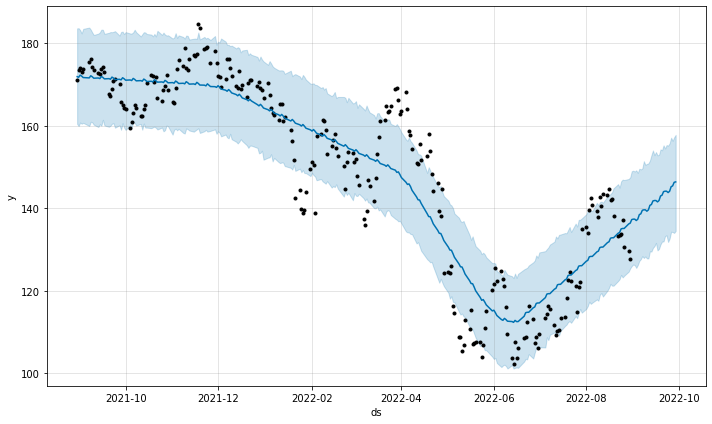

In [ ]:
figure = m.plot(forecast, xlabel = 'ds', ylabel ='y')

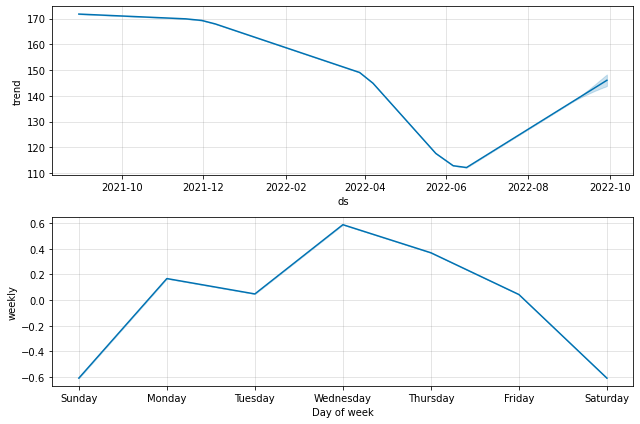

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
